# Importing the dataset

In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [534]:
data = pd.read_csv('kidney_disease.csv')

In [535]:
data

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [536]:
data.iloc[0]

id                         0
age                       48
bp                        80
sg                      1.02
al                         1
su                         0
rbc                      NaN
pc                    normal
pcc               notpresent
ba                notpresent
bgr                      121
bu                        36
sc                       1.2
sod                      NaN
pot                      NaN
hemo                    15.4
pcv                       44
wc                      7800
rc                       5.2
htn                      yes
dm                       yes
cad                       no
appet                   good
pe                        no
ane                       no
classification           ckd
Name: 0, dtype: object

# Feature Engineering and Exploratory Data Analysis

In [537]:
data.drop('id',axis=1,inplace=True)

In [538]:
data.corr()

age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.159480 -0.191096  0.122091  0.220866  0.244992  0.196985   
bp    0.159480  1.000000 -0.218836  0.160689  0.222576  0.160193  0.188517   
sg   -0.191096 -0.218836  1.000000 -0.469760 -0.296234 -0.374710 -0.314295   
al    0.122091  0.160689 -0.469760  1.000000  0.269305  0.379464  0.453528   
su    0.220866  0.222576 -0.296234  0.269305  1.000000  0.717827  0.168583   
bgr   0.244992  0.160193 -0.374710  0.379464  0.717827  1.000000  0.143322   
bu    0.196985  0.188517 -0.314295  0.453528  0.168583  0.143322  1.000000   
sc    0.132531  0.146222 -0.361473  0.399198  0.223244  0.114875  0.586368   
sod  -0.100046 -0.116422  0.412190 -0.459896 -0.131776 -0.267848 -0.323054   
pot   0.058377  0.075151 -0.072787  0.129038  0.219450  0.066966  0.357049   
hemo -0.192928 -0.306540  0.602582 -0.634632 -0.224775 -0.306189 -0.610360   

            sc       sod       pot      hemo  
age   0.132531 -0.100046  0.058377 -0.192928  
bp    0.146222 -0.116422  0.075151 -0.306540  
sg   -0.361473  0.412190 -0.072787  0.602582  
al    0.399198 -0.459896  0.129038 -0.634632  
su    0.223244 -0.131776  0.219450 -0.224775  
bgr   0.114875 -0.267848  0.066966 -0.306189  
bu    0.586368 -0.323054  0.357049 -0.610360  
sc    1.000000 -0.690158  0.326107 -0.401670  
sod  -0.690158  1.000000  0.097887  0.365183  
pot   0.326107  0.097887  1.000000 -0.133746  
hemo -0.401670  0.365183 -0.133746  1.000000

In [539]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [540]:


data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [541]:
def fill_miss(cols):
    classi = cols;
    if classi == 'ckd\t':
        return 'ckd'
    else:
        return classi

In [542]:
data['classification'] = data['classification'].apply(fill_miss)

In [543]:
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [544]:
data['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [545]:
data['pe'] = data['pe'].fillna(data['pe'].mode()[0])

In [546]:
data['ane'] = data['ane'].fillna(data['ane'].mode()[0])

In [547]:
data['appet'] = data['appet'].fillna(data['appet'].mode()[0])

In [548]:
data['cad'] = data['cad'].fillna(data['cad'].mode()[0])

In [549]:
data['dm'] = data['dm'].fillna(data['dm'].mode()[0])

In [550]:
data['htn'] = data['htn'].fillna(data['htn'].mode()[0])

In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [552]:
data['pcc'] = data['pcc'].fillna(data['pcc'].mode()[0])

In [553]:
data['ba'] = data['ba'].fillna(data['ba'].mode()[0])

In [554]:
data['age'] = data['age'].fillna(data['age'].mode()[0])

In [555]:
data['bp'] = data['bp'].fillna(data['bp'].mode()[0])

In [556]:
data['sc'] = data['sc'].fillna(data['sc'].mean())

In [557]:
data['bu'] = data['bu'].fillna(data['bu'].mean())

<AxesSubplot:xlabel='classification', ylabel='count'>

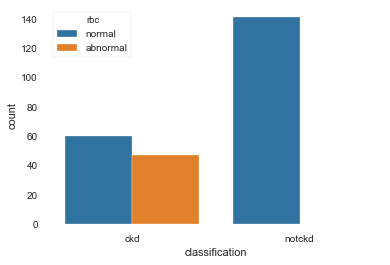

In [558]:
sns.countplot(data['classification'],hue=data['rbc'])

In [559]:
data

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0    121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1      NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2    423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3    117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4    106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  
..     ...  ...  ...   ...  ...  ...  ...  ..   ...  ...  ...            ...  
395  140.0  ...   47  6700  4.9   no   no  no  good   no   no         notckd  
396   75.0  ...   54  7800  6.2   no   no  no  good   no   no         notckd  
397  100.0  ...   49  6600  5.4   no   no  no  good   no   no         notckd  
398  114.0  ...   51  7200  5.9   no   no  no  good   no   no         notckd  
399  131.0  ...   53  6800  6.1   no   no  no  good   no   no         notckd  

[400 rows x 25 columns]

In [560]:
data['pc'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [561]:
data['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

<AxesSubplot:xlabel='pc', ylabel='count'>

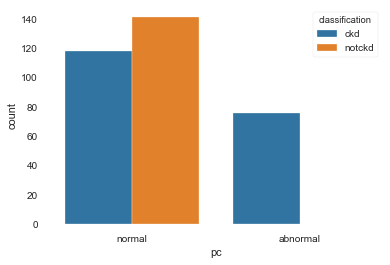

In [562]:
sns.countplot(data['pc'],hue=data['classification'])

In [563]:
import pandas_profiling as pp

In [564]:
pp.ProfileReport(data)

In [565]:
data['classification'] = data['classification'].apply(lambda x: 0 if x == 'notckd' else 1)

In [566]:
data

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0    121.0  ...   44  7800  5.2  yes  yes  no  good   no   no              1  
1      NaN  ...   38  6000  NaN   no   no  no  good   no   no              1  
2    423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes              1  
3    117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes              1  
4    106.0  ...   35  7300  4.6   no   no  no  good   no   no              1  
..     ...  ...  ...   ...  ...  ...  ...  ..   ...  ...  ...            ...  
395  140.0  ...   47  6700  4.9   no   no  no  good   no   no              0  
396   75.0  ...   54  7800  6.2   no   no  no  good   no   no              0  
397  100.0  ...   49  6600  5.4   no   no  no  good   no   no              0  
398  114.0  ...   51  7200  5.9   no   no  no  good   no   no              0  
399  131.0  ...   53  6800  6.1   no   no  no  good   no   no              0  

[400 rows x 25 columns]

In [567]:
dtype_object=data.select_dtypes(include=['object'])
dtype_object.head()

rbc        pc         pcc          ba pcv    wc   rc  htn   dm cad  \
0     NaN    normal  notpresent  notpresent  44  7800  5.2  yes  yes  no   
1     NaN    normal  notpresent  notpresent  38  6000  NaN   no   no  no   
2  normal    normal  notpresent  notpresent  31  7500  NaN   no  yes  no   
3  normal  abnormal     present  notpresent  32  6700  3.9  yes   no  no   
4  normal    normal  notpresent  notpresent  35  7300  4.6   no   no  no   

  appet   pe  ane  
0  good   no   no  
1  good   no   no  
2  poor   no  yes  
3  poor  yes  yes  
4  good   no   no

In [568]:
for x in dtype_object.columns:
    print("{} unique values:".format(x),data[x].unique())
    print("*"*20)

rbc unique values: [nan 'normal' 'abnormal']
********************
pc unique values: ['normal' 'abnormal' nan]
********************
pcc unique values: ['notpresent' 'present']
********************
ba unique values: ['notpresent' 'present']
********************
pcv unique values: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
********************
wc unique values: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '

In [569]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
    
    
    
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [570]:
float(1)

1.0

In [571]:
data=data.replace(dictonary)

In [572]:
data

age    bp     sg   al   su  rbc   pc  pcc  ba    bgr  ...  pcv    wc  \
0    48.0  80.0  1.020  1.0  0.0  NaN  0.0    0   0  121.0  ...   44  7800   
1     7.0  50.0  1.020  4.0  0.0  NaN  0.0    0   0    NaN  ...   38  6000   
2    62.0  80.0  1.010  2.0  3.0  0.0  0.0    0   0  423.0  ...   31  7500   
3    48.0  70.0  1.005  4.0  0.0  0.0  1.0    1   0  117.0  ...   32  6700   
4    51.0  80.0  1.010  2.0  0.0  0.0  0.0    0   0  106.0  ...   35  7300   
..    ...   ...    ...  ...  ...  ...  ...  ...  ..    ...  ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  140.0  ...   47  6700   
396  42.0  70.0  1.025  0.0  0.0  0.0  0.0    0   0   75.0  ...   54  7800   
397  12.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  100.0  ...   49  6600   
398  17.0  60.0  1.025  0.0  0.0  0.0  0.0    0   0  114.0  ...   51  7200   
399  58.0  80.0  1.025  0.0  0.0  0.0  0.0    0   0  131.0  ...   53  6800   

      rc  htn  dm cad appet pe  ane classification  
0    5.2    1   1   0     1  0    0              1  
1    NaN    0   0   0     1  0    0              1  
2    NaN    0   1   0     0  0    1              1  
3    3.9    1   0   0     0  1    1              1  
4    4.6    0   0   0     1  0    0              1  
..   ...  ...  ..  ..   ... ..  ...            ...  
395  4.9    0   0   0     1  0    0              0  
396  6.2    0   0   0     1  0    0              0  
397  5.4    0   0   0     1  0    0              0  
398  5.9    0   0   0     1  0    0              0  
399  6.1    0   0   0     1  0    0              0  

[400 rows x 25 columns]

In [573]:
data['rbc'].value_counts()

0.0    201
1.0     47
Name: rbc, dtype: int64

In [574]:
data.isnull().sum()

age                 0
bp                  0
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 0
ba                  0
bgr                44
bu                  0
sc                  0
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [575]:
data['cad'].value_counts()

0       364
1        34
\tno      2
Name: cad, dtype: int64

In [576]:
data['dm'].value_counts()

0        260
1        134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [577]:
data['cad'] = data['cad'].replace(to_replace='\tno',value=0)
data['dm'] = data['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

In [578]:
data = data.dropna(axis=0)

In [579]:
data.shape

(166, 25)

In [580]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             166 non-null    float64
 1   bp              166 non-null    float64
 2   sg              166 non-null    float64
 3   al              166 non-null    float64
 4   su              166 non-null    float64
 5   rbc             166 non-null    float64
 6   pc              166 non-null    float64
 7   pcc             166 non-null    int64  
 8   ba              166 non-null    int64  
 9   bgr             166 non-null    float64
 10  bu              166 non-null    float64
 11  sc              166 non-null    float64
 12  sod             166 non-null    float64
 13  pot             166 non-null    float64
 14  hemo            166 non-null    float64
 15  pcv             166 non-null    object 
 16  wc              166 non-null    object 
 17  rc              166 non-null    obj

In [581]:
data

age    bp     sg   al   su  rbc   pc  pcc  ba    bgr  ...  pcv     wc  \
3    48.0  70.0  1.005  4.0  0.0  0.0  1.0    1   0  117.0  ...   32   6700   
9    53.0  90.0  1.020  2.0  0.0  1.0  1.0    1   0   70.0  ...   29  12100   
11   63.0  70.0  1.010  3.0  0.0  1.0  1.0    1   0  380.0  ...   32   4500   
14   68.0  80.0  1.010  3.0  2.0  0.0  1.0    1   1  157.0  ...   16  11000   
20   61.0  80.0  1.015  2.0  0.0  1.0  1.0    0   0  173.0  ...   24   9200   
..    ...   ...    ...  ...  ...  ...  ...  ...  ..    ...  ...  ...    ...   
395  55.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  140.0  ...   47   6700   
396  42.0  70.0  1.025  0.0  0.0  0.0  0.0    0   0   75.0  ...   54   7800   
397  12.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  100.0  ...   49   6600   
398  17.0  60.0  1.025  0.0  0.0  0.0  0.0    0   0  114.0  ...   51   7200   
399  58.0  80.0  1.025  0.0  0.0  0.0  0.0    0   0  131.0  ...   53   6800   

      rc  htn  dm cad appet pe  ane  classification  
3    3.9    1   0   0     0  1    1               1  
9    3.7    1   1   0     0  0    1               1  
11   3.8    1   1   0     0  1    0               1  
14   2.6    1   1   1     0  1    0               1  
20   3.2    1   1   1     0  1    1               1  
..   ...  ...  ..  ..   ... ..  ...             ...  
395  4.9    0   0   0     1  0    0               0  
396  6.2    0   0   0     1  0    0               0  
397  5.4    0   0   0     1  0    0               0  
398  5.9    0   0   0     1  0    0               0  
399  6.1    0   0   0     1  0    0               0  

[166 rows x 25 columns]

In [582]:
data

age    bp     sg   al   su  rbc   pc  pcc  ba    bgr  ...  pcv     wc  \
3    48.0  70.0  1.005  4.0  0.0  0.0  1.0    1   0  117.0  ...   32   6700   
9    53.0  90.0  1.020  2.0  0.0  1.0  1.0    1   0   70.0  ...   29  12100   
11   63.0  70.0  1.010  3.0  0.0  1.0  1.0    1   0  380.0  ...   32   4500   
14   68.0  80.0  1.010  3.0  2.0  0.0  1.0    1   1  157.0  ...   16  11000   
20   61.0  80.0  1.015  2.0  0.0  1.0  1.0    0   0  173.0  ...   24   9200   
..    ...   ...    ...  ...  ...  ...  ...  ...  ..    ...  ...  ...    ...   
395  55.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  140.0  ...   47   6700   
396  42.0  70.0  1.025  0.0  0.0  0.0  0.0    0   0   75.0  ...   54   7800   
397  12.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  100.0  ...   49   6600   
398  17.0  60.0  1.025  0.0  0.0  0.0  0.0    0   0  114.0  ...   51   7200   
399  58.0  80.0  1.025  0.0  0.0  0.0  0.0    0   0  131.0  ...   53   6800   

      rc  htn  dm cad appet pe  ane  classification  
3    3.9    1   0   0     0  1    1               1  
9    3.7    1   1   0     0  0    1               1  
11   3.8    1   1   0     0  1    0               1  
14   2.6    1   1   1     0  1    0               1  
20   3.2    1   1   1     0  1    1               1  
..   ...  ...  ..  ..   ... ..  ...             ...  
395  4.9    0   0   0     1  0    0               0  
396  6.2    0   0   0     1  0    0               0  
397  5.4    0   0   0     1  0    0               0  
398  5.9    0   0   0     1  0    0               0  
399  6.1    0   0   0     1  0    0               0  

[166 rows x 25 columns]

In [583]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             166 non-null    float64
 1   bp              166 non-null    float64
 2   sg              166 non-null    float64
 3   al              166 non-null    float64
 4   su              166 non-null    float64
 5   rbc             166 non-null    float64
 6   pc              166 non-null    float64
 7   pcc             166 non-null    int64  
 8   ba              166 non-null    int64  
 9   bgr             166 non-null    float64
 10  bu              166 non-null    float64
 11  sc              166 non-null    float64
 12  sod             166 non-null    float64
 13  pot             166 non-null    float64
 14  hemo            166 non-null    float64
 15  pcv             166 non-null    object 
 16  wc              166 non-null    object 
 17  rc              166 non-null    obj

In [584]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             166 non-null    float64
 1   bp              166 non-null    float64
 2   sg              166 non-null    float64
 3   al              166 non-null    float64
 4   su              166 non-null    float64
 5   rbc             166 non-null    float64
 6   pc              166 non-null    float64
 7   pcc             166 non-null    int64  
 8   ba              166 non-null    int64  
 9   bgr             166 non-null    float64
 10  bu              166 non-null    float64
 11  sc              166 non-null    float64
 12  sod             166 non-null    float64
 13  pot             166 non-null    float64
 14  hemo            166 non-null    float64
 15  pcv             166 non-null    object 
 16  wc              166 non-null    object 
 17  rc              166 non-null    obj

In [585]:
data

age    bp     sg   al   su  rbc   pc  pcc  ba    bgr  ...  pcv     wc  \
3    48.0  70.0  1.005  4.0  0.0  0.0  1.0    1   0  117.0  ...   32   6700   
9    53.0  90.0  1.020  2.0  0.0  1.0  1.0    1   0   70.0  ...   29  12100   
11   63.0  70.0  1.010  3.0  0.0  1.0  1.0    1   0  380.0  ...   32   4500   
14   68.0  80.0  1.010  3.0  2.0  0.0  1.0    1   1  157.0  ...   16  11000   
20   61.0  80.0  1.015  2.0  0.0  1.0  1.0    0   0  173.0  ...   24   9200   
..    ...   ...    ...  ...  ...  ...  ...  ...  ..    ...  ...  ...    ...   
395  55.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  140.0  ...   47   6700   
396  42.0  70.0  1.025  0.0  0.0  0.0  0.0    0   0   75.0  ...   54   7800   
397  12.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  100.0  ...   49   6600   
398  17.0  60.0  1.025  0.0  0.0  0.0  0.0    0   0  114.0  ...   51   7200   
399  58.0  80.0  1.025  0.0  0.0  0.0  0.0    0   0  131.0  ...   53   6800   

      rc  htn  dm cad appet pe  ane  classification  
3    3.9    1   0   0     0  1    1               1  
9    3.7    1   1   0     0  0    1               1  
11   3.8    1   1   0     0  1    0               1  
14   2.6    1   1   1     0  1    0               1  
20   3.2    1   1   1     0  1    1               1  
..   ...  ...  ..  ..   ... ..  ...             ...  
395  4.9    0   0   0     1  0    0               0  
396  6.2    0   0   0     1  0    0               0  
397  5.4    0   0   0     1  0    0               0  
398  5.9    0   0   0     1  0    0               0  
399  6.1    0   0   0     1  0    0               0  

[166 rows x 25 columns]

# Fitting our ML Model

In [586]:
data
y = data['classification']
X = data.drop('classification',axis=1)

In [587]:
y.value_counts()

0    122
1     44
Name: classification, dtype: int64

In [588]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
#X_test = sc.transform(X_test)

In [589]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [590]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [591]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[35  0]
 [ 0 15]]


In [592]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [593]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv = 10)

In [594]:
score.mean()

1.0

In [595]:
score.std()

0.0

In [596]:
import pickle

filename = 'kidney-model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [597]:
data

age    bp     sg   al   su  rbc   pc  pcc  ba    bgr  ...  pcv     wc  \
3    48.0  70.0  1.005  4.0  0.0  0.0  1.0    1   0  117.0  ...   32   6700   
9    53.0  90.0  1.020  2.0  0.0  1.0  1.0    1   0   70.0  ...   29  12100   
11   63.0  70.0  1.010  3.0  0.0  1.0  1.0    1   0  380.0  ...   32   4500   
14   68.0  80.0  1.010  3.0  2.0  0.0  1.0    1   1  157.0  ...   16  11000   
20   61.0  80.0  1.015  2.0  0.0  1.0  1.0    0   0  173.0  ...   24   9200   
..    ...   ...    ...  ...  ...  ...  ...  ...  ..    ...  ...  ...    ...   
395  55.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  140.0  ...   47   6700   
396  42.0  70.0  1.025  0.0  0.0  0.0  0.0    0   0   75.0  ...   54   7800   
397  12.0  80.0  1.020  0.0  0.0  0.0  0.0    0   0  100.0  ...   49   6600   
398  17.0  60.0  1.025  0.0  0.0  0.0  0.0    0   0  114.0  ...   51   7200   
399  58.0  80.0  1.025  0.0  0.0  0.0  0.0    0   0  131.0  ...   53   6800   

      rc  htn  dm cad appet pe  ane  classification  
3    3.9    1   0   0     0  1    1               1  
9    3.7    1   1   0     0  0    1               1  
11   3.8    1   1   0     0  1    0               1  
14   2.6    1   1   1     0  1    0               1  
20   3.2    1   1   1     0  1    1               1  
..   ...  ...  ..  ..   ... ..  ...             ...  
395  4.9    0   0   0     1  0    0               0  
396  6.2    0   0   0     1  0    0               0  
397  5.4    0   0   0     1  0    0               0  
398  5.9    0   0   0     1  0    0               0  
399  6.1    0   0   0     1  0    0               0  

[166 rows x 25 columns]

In [598]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             166 non-null    float64
 1   bp              166 non-null    float64
 2   sg              166 non-null    float64
 3   al              166 non-null    float64
 4   su              166 non-null    float64
 5   rbc             166 non-null    float64
 6   pc              166 non-null    float64
 7   pcc             166 non-null    int64  
 8   ba              166 non-null    int64  
 9   bgr             166 non-null    float64
 10  bu              166 non-null    float64
 11  sc              166 non-null    float64
 12  sod             166 non-null    float64
 13  pot             166 non-null    float64
 14  hemo            166 non-null    float64
 15  pcv             166 non-null    object 
 16  wc              166 non-null    object 
 17  rc              166 non-null    obj

In [600]:
data.iloc[3]

age                  68
bp                   80
sg                 1.01
al                    3
su                    2
rbc                   0
pc                    1
pcc                   1
ba                    1
bgr                 157
bu                   90
sc                  4.1
sod                 130
pot                 6.4
hemo                5.6
pcv                  16
wc                11000
rc                  2.6
htn                   1
dm                    1
cad                   1
appet                 0
pe                    1
ane                   0
classification        1
Name: 14, dtype: object

In [612]:
age = 53
bp = 90
sg = 1.02
al = 2
su = 0
rbc = 1
pc = 1
pcc = 1
bact = 0
bgr = 70
bu = 107
sc = 7.2
sod = 114
pot = 3.7
haem = 9.5
pcv = 29
wc = 12100
rc = 3.7
hyper = 1
dm = 1
cad = 0
appet = 0
pedal = 0
ane = 1

In [613]:
temp = [age,bp,sg,al,su,rbc,pc,pcc,bact,bgr,bu,sc,sod,pot,haem,pcv,wc,rc,hyper,dm,cad,appet,pedal,ane]

In [614]:
data = np.array([temp])

In [615]:
pred = int(classifier.predict(data))

In [616]:
pred

1

In [617]:
pred

1